# Regression model on cost feature

In [7]:
import pandas as pd
import numpy as np
import requests, io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, normalize

In [8]:
data = pd.read_csv('data')
data.drop('Unnamed: 0', axis = 1 , inplace= True)

In [9]:
data.drop(data.columns[0], axis = 1 , inplace= True)

In [10]:
data.head(10)

,apperance,goals,assists,yellow_card,2nd_ycard,red_card,min,apperance_NT,goals_NT,assists_NT,yellow_card_NT,2nd_ycard_NT,red_card_NT,min_NT,age,position,country,cost,National_Team
0,37,0,3,8,0,0,2947.0,6,0,1,0,0,0,152.0,Goalkeeper,23.0,Egypt,500000.0,1
1,130,5,5,15,1,0,10770.0,5,0,0,1,0,0,207.0,midfield,26.0,Egypt,500000.0,1
2,167,1,15,16,0,0,13304.0,6,0,1,1,0,0,424.0,midfield,21.0,Egypt,150000.0,1
3,15,3,0,2,0,0,341.0,0,0,0,0,0,0,0.0,attack,24.0,Egypt,200000.0,0
4,40,4,3,9,0,0,2478.0,9,1,1,1,0,0,487.0,midfield,19.0,Russia,250000.0,1
5,60,4,1,6,0,1,4788.0,0,0,0,0,0,0,0.0,defence,19.0,Italy,200000.0,0
6,213,17,21,20,1,0,14912.0,4,1,0,0,0,0,193.0,midfield,25.0,England,450000.0,1
7,68,5,4,6,2,0,4787.0,9,1,3,1,0,0,626.0,defence,24.0,Ukraine,400000.0,1
8,117,8,10,14,0,0,5788.0,0,0,0,0,0,0,0.0,attack,25.0,Ukraine,500000.0,0
9,49,14,3,12,0,1,3082.0,0,0,0,0,0,0,0.0,attack,25.0,Spain,400000.0,0


In [11]:
data.isna().sum()

apperance           0
goals               0
assists             0
yellow_card         0
2nd_ycard           0
red_card            0
min                 0
apperance_NT        0
goals_NT            0
assists_NT          0
yellow_card_NT      0
2nd_ycard_NT        0
red_card_NT         0
min_NT              0
age                 0
position            0
country           925
cost                0
National_Team       0
dtype: int64

# 

### data preprocessing

In [12]:
data.rename(columns={'position':'Age'}, inplace= True)
data.rename(columns={'age':'position'}, inplace= True)
data.rename(columns={'Age':'age'}, inplace= True)

In [13]:
data.position.value_counts()

defence       8866
midfield      8422
attack        8400
Goalkeeper    2958
GoalKeeper       1
Name: position, dtype: int64

In [14]:
data.replace({'position':{'GoalKeeper':'Goalkeeper'}}, inplace= True)

In [15]:
data.shape

(28647, 19)

In [16]:
dummie = pd.get_dummies(data.position)

In [17]:
data = pd.concat([data, dummie], axis = 1)

In [18]:
data.drop(['country', 'position','red_card_NT','2nd_ycard_NT','yellow_card_NT','red_card','2nd_ycard','yellow_card'], axis= 1 , inplace= True)

In [19]:
data.head(2)

,apperance,goals,assists,min,apperance_NT,goals_NT,assists_NT,min_NT,age,cost,National_Team,Goalkeeper,attack,defence,midfield
0,37,0,3,2947.0,6,0,1,152.0,23.0,500000.0,1,1,0,0,0
1,130,5,5,10770.0,5,0,0,207.0,26.0,500000.0,1,0,0,0,1


In [20]:
data.skew().sort_values(ascending= False)

goals_NT         24.332324
assists_NT       19.598220
apperance_NT      7.668328
goals             6.867819
assists           5.193607
Goalkeeper        2.607147
apperance         1.550298
min               1.525228
cost              1.340561
attack            0.908471
midfield          0.904406
National_Team     0.841109
defence           0.824249
min_NT          -19.687122
age                    NaN
dtype: float64

### outliers 

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


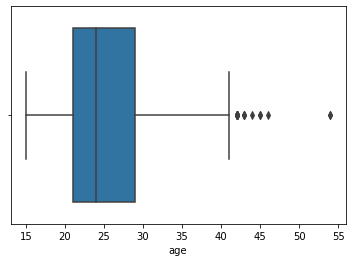

In [21]:
%matplotlib inline
s = sns.boxplot(data['age'])
plt.show()

In [22]:
ageOutliers = data[data.age > 38].index.tolist()

In [23]:
data.drop(ageOutliers, inplace= True)

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


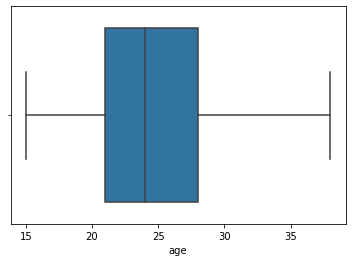

In [24]:
sns.boxplot(data.age)
plt.show()

In [25]:
data.skew().sort_values(ascending= False)

goals_NT         24.602625
assists_NT       19.799267
apperance_NT      7.764581
goals             6.965683
assists           5.248064
Goalkeeper        2.625486
apperance         1.531736
min               1.496178
cost              1.336699
attack            0.908087
midfield          0.901783
National_Team     0.842782
defence           0.821932
age               0.532033
min_NT          -20.458556
dtype: float64

# 

## appling log transformatioin to high values 'skewed columns'

In [26]:
for i in ['goals_NT', 'assists_NT', 'apperance_NT']:
    data[i] += 10
    data[i] = np.log(data[i])

# 

## Normailzing data

In [27]:
nordata = normalize(data[['cost','min','min_NT','apperance','age', 'goals','assists']])

In [28]:
xdata = pd.DataFrame(nordata,columns=['cost_','min_','min_NT_','apperance_','age_','goals_','assists_'])

In [29]:
data = pd.concat([data, xdata], axis=1)

In [30]:
data.drop(['cost','min','min_NT','apperance','age','goals','assists'], axis=1, inplace= True)

In [31]:
data.head(2)

,apperance_NT,goals_NT,assists_NT,National_Team,Goalkeeper,attack,defence,midfield,cost_,min_,min_NT_,apperance_,age_,goals_,assists_
0,2.772589,2.302585,2.397895,1.0,1.0,0.0,0.0,0.0,0.999983,0.005894,0.000304,0.000074,0.000046,0.00000,0.000006
1,2.708050,2.302585,2.302585,1.0,0.0,0.0,0.0,1.0,0.999768,0.021535,0.000414,0.000260,0.000052,0.00001,0.000010


In [32]:
data.dropna(inplace= True)

In [33]:
data.shape

(28401, 15)

# 

In [34]:
X = data.drop('cost_', axis=1)
y = data.cost_

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 75)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [37]:
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
print(regressor.intercept_)

45685815829.10036


In [39]:
y_pred = regressor.predict(X_test)

In [40]:
regressor.score(X_test, y_test)

0.7507173553328816

In [41]:
regressor.score(X_train, y_train)

0.7197762961675397

# 

### Using Ridge (L2 Regularized) Regression Model

In [42]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1, max_iter=1000, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1000, tol=0.1)

In [43]:
ridge_reg.score(X_test, y_test)

0.7582557133012059

In [44]:
ridge_reg.score(X_train, y_train)

0.7163965947911732

# 

# XGBOOST ALGORITHMS

In [52]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [53]:
reg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
reg.fit(X_train, y_train)

[08:20:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [54]:
pred = reg.predict(X_test)

In [55]:
reg.score(X_test, y_test)

0.9340914820780446

In [56]:
reg.score(X_train, y_train)

0.9445375895427852

In [57]:
rmse = np.sqrt(MSE(y_test, pred))
rmse

0.013880727812687203